# Downsampling Analysis (Can be ignored.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gmean
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from src.config import get_interim_dir, get_validation_barcodes, get_common_barcodes

In [2]:
DOWNSAMPLING_LEVELS = ["full", "half", "quarter", "hundreth"]
FILTER_COUNT = 700
SUBSCREEN_ALIASES = ["MBsub1", "MBsub2", "MBsub3"]

In [3]:
data = []
for alias in SUBSCREEN_ALIASES:
    for ds in DOWNSAMPLING_LEVELS:
        X = pd.read_pickle(get_interim_dir() + "{}_gRNAwise_reduced_repair_outcome_profiles.{}.{}.pkl".format(alias, FILTER_COUNT, ds))
        X["Downsample"] = ds
        X = X.reset_index().set_index(["Downsample", "Target", "Alias", "Gene", "Barcode"])
        data.append(X)
data = pd.concat(data, axis=0)
d_norm = data.div(data.sum(axis=1), axis=0)
d_norm.head()

lumc_category                                           Deletion 0bp microhomology  \
Downsample Target Alias  Gene          Barcode                                       
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                    0.101984   
                                       1700025G04Rik-2                    0.096509   
                                       1700025G04Rik-4                    0.099110   
                         1700123O20Rik 1700123O20Rik-1                    0.102226   
                                       1700123O20Rik-2                    0.099967   

lumc_category                                           Deletion 1bp microhomology  \
Downsample Target Alias  Gene          Barcode                                       
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                    0.138556   
                                       1700025G04Rik-2                    0.124973   
                                       1700025G04Rik-4                    0.127989   
                         1700123O20Rik 1700123O20Rik-1                    0.126877   
                                       1700123O20Rik-2                    0.130148   

lumc_category                                           Deletion 2bp microhomology  \
Downsample Target Alias  Gene          Barcode                                       
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                    0.186317   
                                       1700025G04Rik-2                    0.190453   
                                       1700025G04Rik-4                    0.186801   
                         1700123O20Rik 1700123O20Rik-1                    0.174949   
                                       1700123O20Rik-2                    0.184611   

lumc_category                                           Deletion with insertion  \
Downsample Target Alias  Gene          Barcode                                    
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                 0.092447   
                                       1700025G04Rik-2                 0.097583   
                                       1700025G04Rik-4                 0.098449   
                         1700123O20Rik 1700123O20Rik-1                 0.102870   
                                       1700123O20Rik-2                 0.101000   

lumc_category                                           Homology Directed Repair  \
Downsample Target Alias  Gene          Barcode                                     
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                  0.095716   
                                       1700025G04Rik-2                  0.106628   
                                       1700025G04Rik-4                  0.102771   
                         1700123O20Rik 1700123O20Rik-1                  0.099075   
                                       1700123O20Rik-2                  0.099270   

lumc_category                                           Any Insertion  \
Downsample Target Alias  Gene          Barcode                          
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1       0.102292   
                                       1700025G04Rik-2       0.098530   
                                       1700025G04Rik-4       0.095988   
                         1700123O20Rik 1700123O20Rik-1       0.104493   
                                       1700123O20Rik-2       0.096302   

lumc_category                                           Deletion 3+bp microhomology  
Downsample Target Alias  Gene          Barcode                                       
full       T1     MBsub1 1700025G04Rik 1700025G04Rik-1                     0.282687  
                                       1700025G04Rik-2                     0.285324  
                                       1700025G04Rik-4                     0.288892  
                         1700123O20Rik 1700123O20Rik-1                     0.2

/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_29616/3096103965.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  X = np.log10(data.loc[(ds, "T1", alias)].sum(axis=1))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_29616/3096103965.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  X = np.log10(data.loc[(ds, "T1", alias)].sum(axis=1))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_29616/3096103965.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  X = np.log10(data.loc[(ds, "T1", alias)].sum(axis=1))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_29616/3096103965.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  X = np.log10(data.loc[(ds, "T1", alias)].sum(axis=1))
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_29616/3096103965.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  X = 

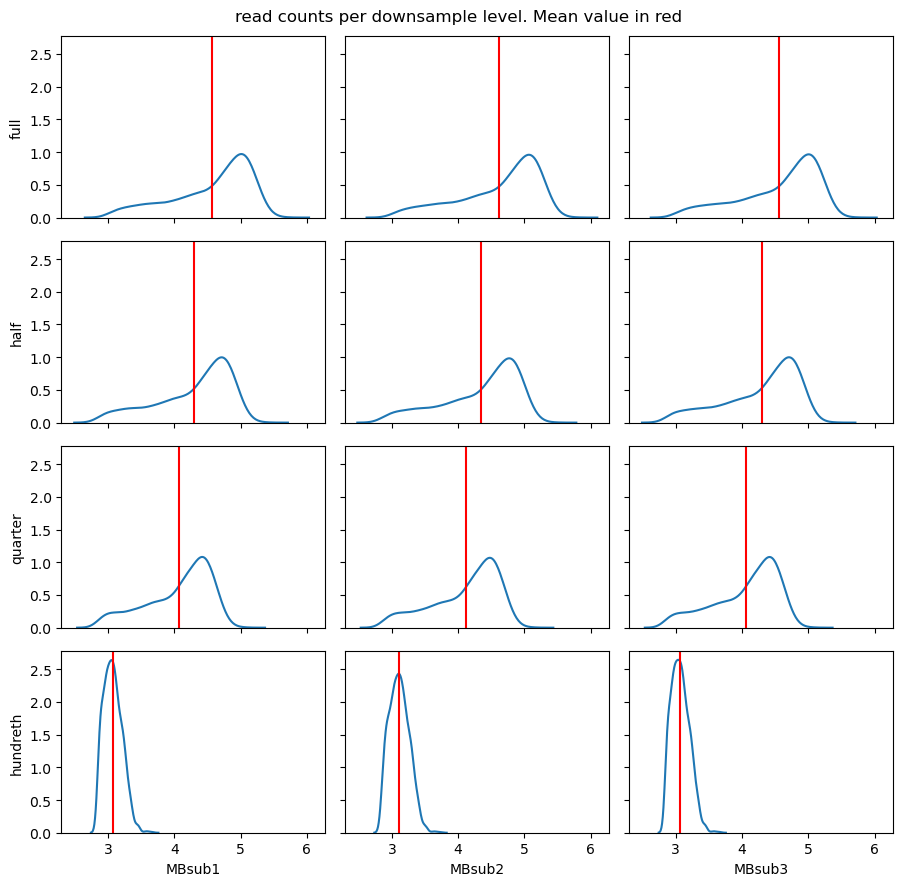

In [4]:
fig, axes = plt.subplots(len(DOWNSAMPLING_LEVELS), len(SUBSCREEN_ALIASES), figsize=(9,9), sharey=True, sharex=True)

for i, ds in enumerate(DOWNSAMPLING_LEVELS):
    axes[i, 0].set_ylabel(ds)
    axes[i, 1].set_ylabel("")
    # axes[i, 2].set_ylabel("")
    for j, alias in enumerate(SUBSCREEN_ALIASES):
        X = np.log10(data.loc[(ds, "T1", alias)].sum(axis=1))
        sns.kdeplot(X, ax=axes[i, j])
        axes[i, j].axvline(X.mean(), c="red")
        axes[len(DOWNSAMPLING_LEVELS) - 1, j].set_xlabel(alias)
plt.suptitle("read counts per downsample level. Mean value in red")
plt.tight_layout()

In [5]:
all_genes = d_norm.index.get_level_values(3).value_counts().drop("NonTargeting")
max_gene_count = all_genes.max()
sample_barcodes = (all_genes[all_genes == max_gene_count]).index.to_list()
sample_barcodes[:5]

['Retreg1', 'Hspa1l', 'Cmc1', 'Semp2l2b', 'Cnih1']

In [6]:
def get_mean_correlation(square_df):
    mask = np.ones(square_df.shape, dtype='bool')
    mask[np.triu_indices(len(square_df))] = False
    square_df[~mask] = np.nan
    square_df_mean = np.nanmean(square_df.values)
    return square_df_mean

In [7]:
idx = pd.IndexSlice
full_mean = []
half_mean = []
quarter_mean = []
hundredth_mean = []

for bc in sample_barcodes:
    cors = d_norm.loc[idx[:,:,:,bc], :].T.corr()
    is_full = cors.index.get_level_values(0).to_series().str.contains("full")
    cors_full = cors.loc[is_full.values, is_full.values]
    full_mean.append(get_mean_correlation(cors_full))

    is_half = cors.index.get_level_values(0).to_series().str.contains("half")
    cors_half = cors.loc[is_half.values, is_half.values]
    half_mean.append(get_mean_correlation(cors_half))

    is_quarter = cors.index.get_level_values(0).to_series().str.contains("quarter")
    cors_quarter = cors.loc[is_quarter.values, is_quarter.values]
    quarter_mean.append(get_mean_correlation(cors_quarter))

    is_hundredth = cors.index.get_level_values(0).to_series().str.contains("hundreth")
    cors_hundredth = cors.loc[is_hundredth.values, is_hundredth.values]
    hundredth_mean.append(get_mean_correlation(cors_hundredth))

(0.0, 1.0)

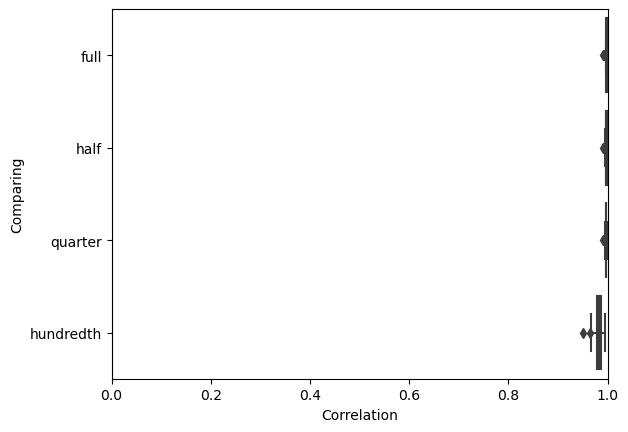

In [8]:
boxplot_df = pd.DataFrame({"full": full_mean, "half": half_mean, "quarter": quarter_mean, "hundredth": hundredth_mean})
boxplot_df = boxplot_df.stack().droplevel(0).reset_index().rename(columns={"index": "Comparing", 0: "Correlation"})
sns.boxplot(boxplot_df, y="Comparing", x="Correlation")
plt.xlim(0, 1)

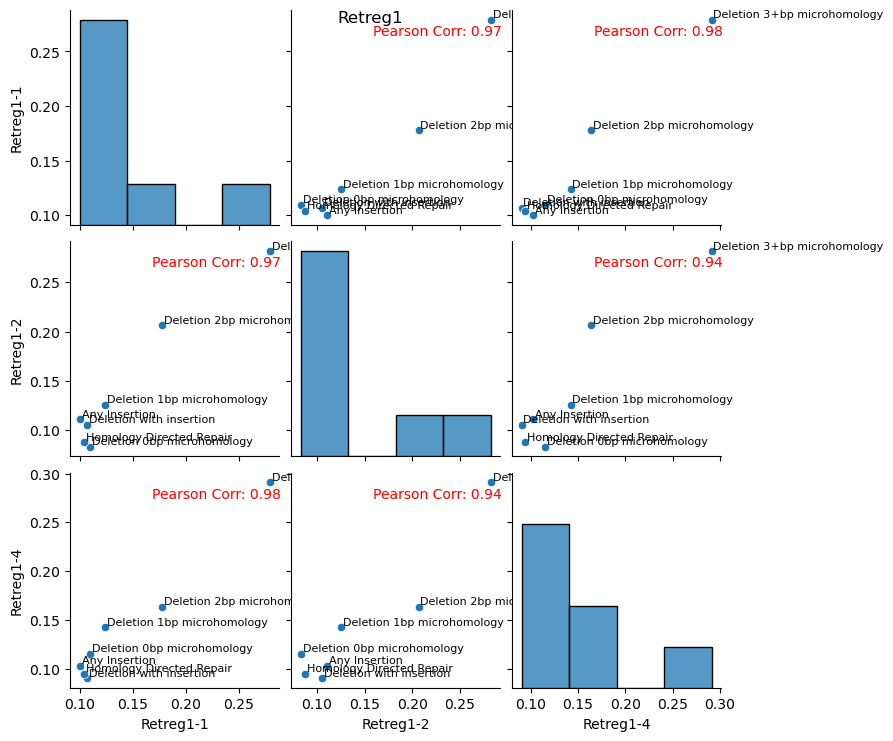

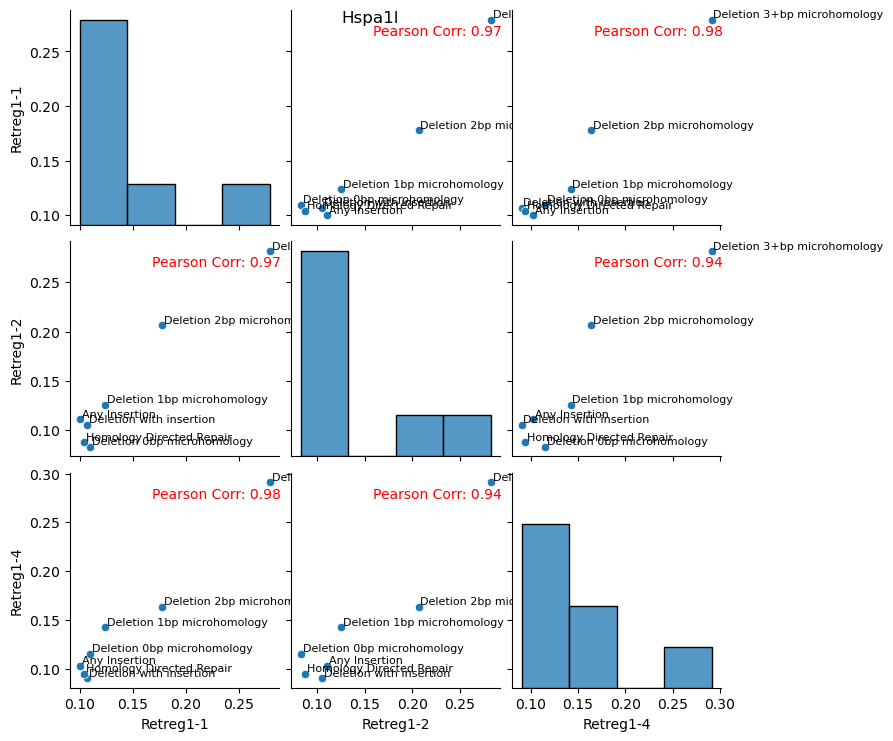

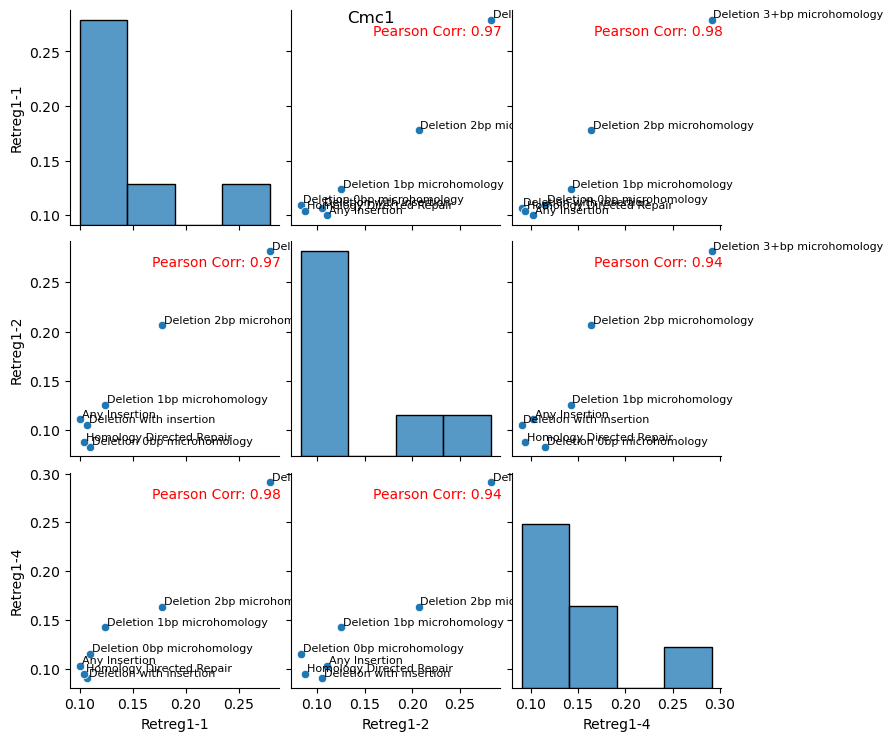

In [9]:
for sample_barcode in sample_barcodes[:3]:
    pairplot_df = d_norm.loc[idx[:,:,:,sample_barcodes[0]], :].T.droplevel("Target", axis=1).droplevel("Gene", axis=1)\
        .xs("MBsub1", level="Alias", axis=1)\
        .xs("hundreth", level="Downsample", axis=1)
    labels = pairplot_df.index.to_list()
    g = sns.pairplot(pairplot_df)

    for i, c1 in enumerate(pairplot_df.columns):
        x = pairplot_df[c1]
        texts = x.index
        for j, c2 in enumerate(pairplot_df.columns):
            if i == j:
                continue
            y = pairplot_df[c2]
            ax = g.axes[j, i]

            ax.text(0.7, 0.9, 'Pearson Corr: {:.2f}'.format(np.corrcoef(x, y)[0, 1]),
                color='red',
                horizontalalignment='center',
                verticalalignment='center',
                transform = ax.transAxes)

            for k, txt in enumerate(texts):
                ax.text(x[k] + 0.002, y[k] + 0.002, texts[k], size=8, fontdict=None)
    plt.suptitle(sample_barcode)
    plt.show()